In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
from sklearn import preprocessing as prep
from sklearn import tree
from sklearn import linear_model as lm
from sklearn import feature_extraction as feat
from sklearn import feature_selection as fs
from sklearn import model_selection as cv
from sklearn import metrics
from sklearn import ensemble
from sklearn import naive_bayes as nb
from sklearn import svm
from sklearn import decomposition
from sklearn.pipeline import Pipeline

In [2]:
dfTrain = pd.read_csv('data/train.csv', index_col='id')
dfTest = pd.read_csv('data/test.csv', index_col='id')


with open('cols.yaml', 'r') as fin:
    cols = yaml.safe_load(fin)
bin_cols = cols['binary']
cat_cols = cols['nominal']
ord_cols = cols['ordinal']
num_cols = cols['ratio']

cols = bin_cols + cat_cols + ord_cols + num_cols

#### Work - change below this

In [3]:
X = dfTrain[num_cols]
pca = decomposition.PCA()
pca.fit(X)

PCA()

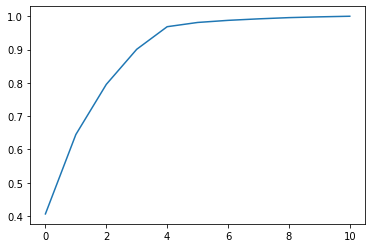

In [4]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

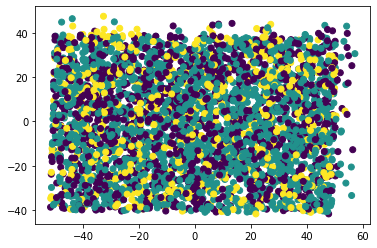

In [7]:
pca = decomposition.PCA(n_components=2)
x_red = pca.fit_transform(X)

plt.scatter(*x_red.T, c=dfTrain['label'].values)

<AxesSubplot:>

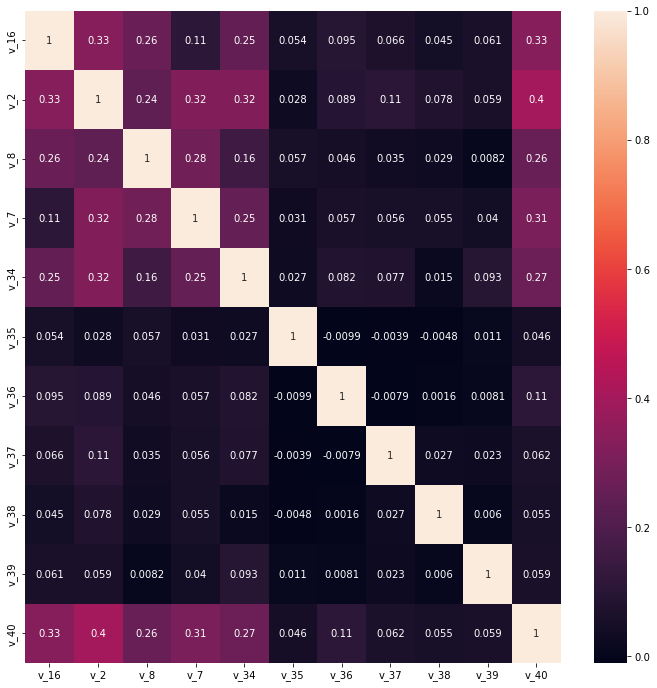

In [15]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dfTrain[num_cols].corr(), annot=True, ax=ax)

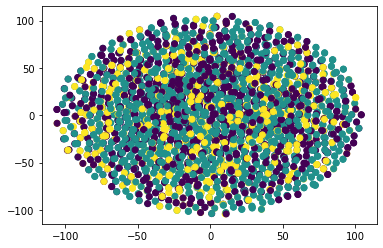

In [25]:
from sklearn.manifold import TSNE

x_red = TSNE(perplexity=0.0001, n_components=2).fit_transform(X)
plt.scatter(*x_red.T, c=dfTrain['label'].values)

In [27]:
x_scl = prep.StandardScaler().fit_transform(X)

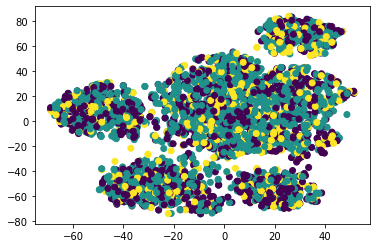

In [29]:
x_red = TSNE(n_components=2).fit_transform(x_scl)
plt.scatter(*x_red.T, c=dfTrain['label'].values)

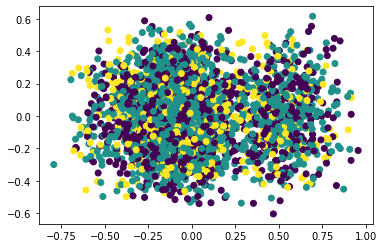

In [49]:
kpca = decomposition.KernelPCA(2, kernel='sigmoid')
x_red = kpca.fit_transform(x_scl)
plt.scatter(*x_red.T, c=dfTrain['label'].values)

In [50]:
# RFC with num_cols

X = dfTrain[num_cols].values
y = dfTrain['label'].values
cv.cross_val_score(ensemble.RandomForestClassifier(), X, y).mean()

0.4849826641703072

In [51]:
# Same but scaled data

X = prep.StandardScaler().fit_transform(dfTrain[num_cols].values)
y = dfTrain['label'].values
cv.cross_val_score(ensemble.RandomForestClassifier(), X, y).mean()

0.48761979058317734

In [52]:
# So scaling does not help an RFC, does decorrelation help it?

In [53]:
pca = decomposition.PCA(n_components=4)

X = pca.fit_transform(dfTrain[num_cols].values)
y = dfTrain['label'].values
cv.cross_val_score(ensemble.RandomForestClassifier(), X, y).mean()

0.4415151515151516

In [54]:
# Check logistic regression

X = dfTrain[num_cols].values
y = dfTrain['label'].values
cv.cross_val_score(lm.LogisticRegression(max_iter=1000), X, y).mean()

0.48998855835240274

In [55]:
X = prep.StandardScaler().fit_transform(dfTrain[num_cols].values)
y = dfTrain['label'].values
cv.cross_val_score(lm.LogisticRegression(max_iter=1000), X, y).mean()

0.4902520629637334

In [57]:
X = prep.StandardScaler().fit_transform(dfTrain[num_cols].values)

Text(0, 0.5, 'CV score')

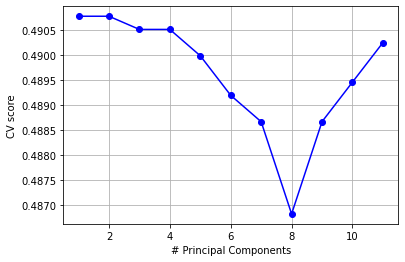

In [64]:
scores = []
for comp in range(1, X.shape[1] + 1):

    x_red = decomposition.PCA(n_components=comp).fit_transform(X)
    y = dfTrain['label'].values
    scores.append(cv.cross_val_score(lm.LogisticRegression(max_iter=1000), x_red, y).mean())
plt.plot(np.arange(1, X.shape[1] + 1), scores, '-bo')
plt.grid()
plt.xlabel('# Principal Components')
plt.ylabel('CV score')

In [15]:
X = dfTrain[num_cols].values
y = dfTrain['label'].values

poly = prep.PolynomialFeatures(2)
pipe = Pipeline([
    ('pca', decomposition.PCA(n_components=2)),
    ('poly', poly),
    ('scale', prep.StandardScaler()),
    ('lr', lm.LogisticRegression(max_iter=1000000))
])

cv.cross_val_score(pipe, X, y).mean()

0.4907797656195826

In [16]:
X = dfTrain[num_cols].values
y = dfTrain['label'].values

poly = prep.PolynomialFeatures(3)
pipe = Pipeline([
    ('pca', decomposition.PCA(n_components=2)),
    ('poly', poly),
    ('scale', prep.StandardScaler()),
    ('lr', lm.LogisticRegression(max_iter=1000000))
])

cv.cross_val_score(pipe, X, y).mean()

0.49051626100825185

In [27]:
X = dfTrain[num_cols].values
y = dfTrain['label'].values

poly = prep.PolynomialFeatures(4)
pipe = Pipeline([
    ('pca', decomposition.PCA(n_components=2)),
    ('poly', poly),
    ('scale', prep.StandardScaler()),
    ('lr', lm.LogisticRegression(max_iter=1000000))
])

cv.cross_val_score(pipe, X, y).mean()

0.4920969419596422